In [6]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np


## CommonSense

## Goals
- Triangulate same object from different views

### Steps
1. Process one feed
1. Take a video of the empty seating space, and have it be occupied sometime during the video
1. On test video, identify a marker form the image
1. On test video, determine bounds
1. Attempt to determine occupancy from a planar 2D section

### If possible
5. Cross stitch information from two views
2. Capture visuals of the same scene from two different cameras

## 1. Process one feed

In [2]:
camera = cv2.VideoCapture(0)

In [3]:
# # starts a browser view of the default camera connected to the device
# while True:
#     ret, frame = camera.read()
#     cv2.imshow('frame', frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# camera.release()
# cv2.destroyAllWindows()

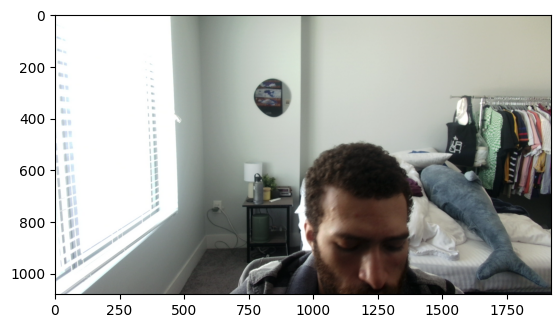

In [4]:
# get a single frame from the camera
ret, frame = camera.read()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) # we convert the image to RGB 
                                                   # because matplotlib uses RGB, 
                                                   # while cv2 uses BGR

camera.release()

In [8]:
#read frames from a folder
path = 'frames/'
frames = []

for filename, index in os.listdir(path):
    img = cv2.imread(os.path.join(path,filename))
    if img is not None:
        frames.append(img)



In [10]:
#make mp4 video from frames
height, width, layers = frames[0].shape
size = (width,height)
out = cv2.VideoWriter('video.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 30, size)

for frame in frames:
    out.write(frame)

out.release()